In [ ]:
import pandas as pd

# Mount Google Drive if needed (only if files are stored there)
from google.colab import drive
drive.mount('/content/drive')

# Load dataset
train_df = pd.read_csv("/content/train.csv")
test_df = pd.read_csv("/content/test.csv")

# Check the first few rows
train_df.head()


Mounted at /content/drive


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
# Check dataset info
train_df.info()

# Check missing values
train_df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


,0
Loan_ID,0
Gender,13
Married,3
Dependents,15
Education,0
Self_Employed,32
ApplicantIncome,0
CoapplicantIncome,0
LoanAmount,22
Loan_Amount_Term,14


In [ ]:
# Fill categorical missing values with mode
for col in ["Gender", "Married", "Dependents", "Self_Employed"]:
    train_df[col].fillna(train_df[col].mode()[0], inplace=True)

# Fill numerical missing values
train_df["LoanAmount"].fillna(train_df["LoanAmount"].median(), inplace=True)
train_df["Loan_Amount_Term"].fillna(train_df["Loan_Amount_Term"].mode()[0], inplace=True)
train_df["Credit_History"].fillna(train_df["Credit_History"].mode()[0], inplace=True)

# Verify missing values are handled
print(train_df.isnull().sum())


Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


<ipython-input-3-0bfc21e346cc>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df[col].fillna(train_df[col].mode()[0], inplace=True)
<ipython-input-3-0bfc21e346cc>:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)',

In [ ]:
train_df.drop(columns=["Loan_ID"], inplace=True)


In [ ]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for binary categories
binary_cols = ["Gender", "Married", "Education", "Self_Employed", "Loan_Status"]
le = LabelEncoder()
for col in binary_cols:
    train_df[col] = le.fit_transform(train_df[col])

# One-Hot Encoding for categorical columns with multiple categories
train_df = pd.get_dummies(train_df, columns=["Dependents", "Property_Area"], drop_first=True)

# Check transformed dataset
train_df.head()


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,1,False,False,False,False,True
1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,True,False,False,False,False
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,1,False,False,False,False,True
3,1,1,1,0,2583,2358.0,120.0,360.0,1.0,1,False,False,False,False,True
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,1,False,False,False,False,True


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]] = scaler.fit_transform(train_df[["ApplicantIncome", "CoapplicantIncome", "LoanAmount"]])

# Check final processed dataset
train_df.head()


,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,0.072991,-0.554487,-0.211241,360.0,1.0,1,False,False,False,False,True
1,1,1,0,0,-0.134412,-0.038732,-0.211241,360.0,1.0,0,True,False,False,False,False
2,1,1,0,1,-0.393747,-0.554487,-0.948996,360.0,1.0,1,False,False,False,False,True
3,1,1,1,0,-0.462062,0.251980,-0.306435,360.0,1.0,1,False,False,False,False,True
4,1,0,0,0,0.097728,-0.554487,-0.056551,360.0,1.0,1,False,False,False,False,True


In [ ]:
# Display first few rows
print(train_df.head())

# Check summary statistics
print(train_df.describe())

# Check data types and missing values again
print(train_df.info())

# Check class distribution of target variable (Loan_Status)
print(train_df["Loan_Status"].value_counts(normalize=True) * 100)  # Percentage distribution


   Gender  Married  Education  Self_Employed  ApplicantIncome  \
0       1        0          0              0         0.072991   
1       1        1          0              0        -0.134412   
2       1        1          0              1        -0.393747   
3       1        1          1              0        -0.462062   
4       1        0          0              0         0.097728   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0          -0.554487   -0.211241             360.0             1.0   
1          -0.038732   -0.211241             360.0             1.0   
2          -0.554487   -0.948996             360.0             1.0   
3           0.251980   -0.306435             360.0             1.0   
4          -0.554487   -0.056551             360.0             1.0   

   Loan_Status  Dependents_1  Dependents_2  Dependents_3+  \
0            1         False         False          False   
1            0          True         False          False   
2    

<ipython-input-8-0420fca00a09>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=train_df['Loan_Status'], palette='viridis')


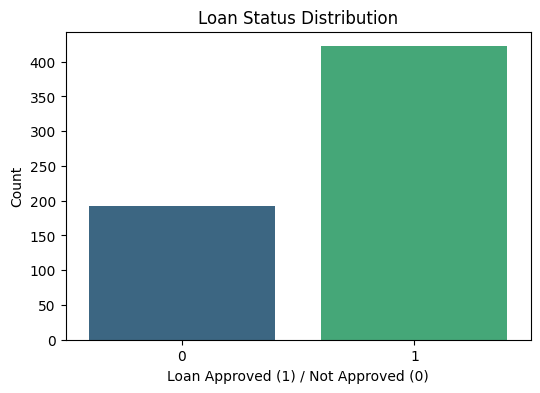

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Loan Status Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=train_df['Loan_Status'], palette='viridis')
plt.title('Loan Status Distribution')
plt.xlabel('Loan Approved (1) / Not Approved (0)')
plt.ylabel('Count')
plt.show()


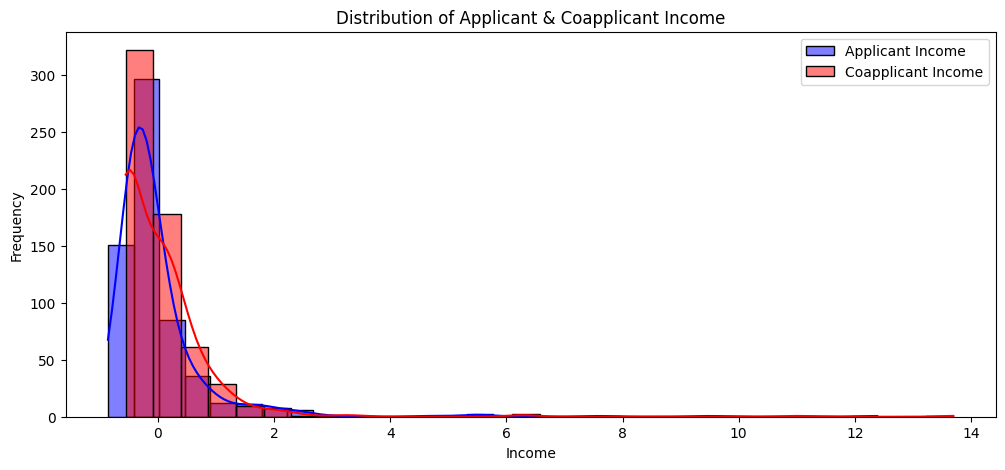

In [ ]:
plt.figure(figsize=(12,5))
sns.histplot(train_df['ApplicantIncome'], kde=True, bins=30, color='blue', label='Applicant Income')
sns.histplot(train_df['CoapplicantIncome'], kde=True, bins=30, color='red', label='Coapplicant Income')
plt.legend()
plt.title('Distribution of Applicant & Coapplicant Income')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


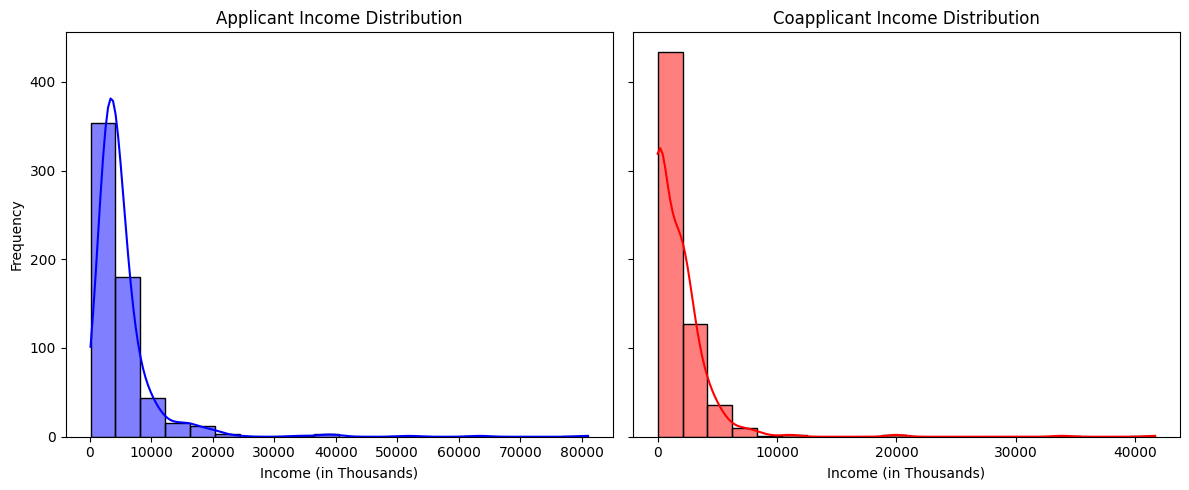

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
data = pd.read_csv("/content/train.csv")

# Ensure there are no missing values
data = data[['ApplicantIncome', 'CoapplicantIncome']].dropna()

# Extract relevant columns
applicant_income = data['ApplicantIncome']
coapplicant_income = data['CoapplicantIncome']

# Creating subplots for better clarity
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Histogram for Applicant Income
sns.histplot(applicant_income, bins=20, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Applicant Income Distribution")
axes[0].set_xlabel("Income (in Thousands)")
axes[0].set_ylabel("Frequency")

# Histogram for Coapplicant Income
sns.histplot(coapplicant_income, bins=20, kde=True, color="red", ax=axes[1])
axes[1].set_title("Coapplicant Income Distribution")
axes[1].set_xlabel("Income (in Thousands)")

# Improve layout
plt.tight_layout()
plt.show()



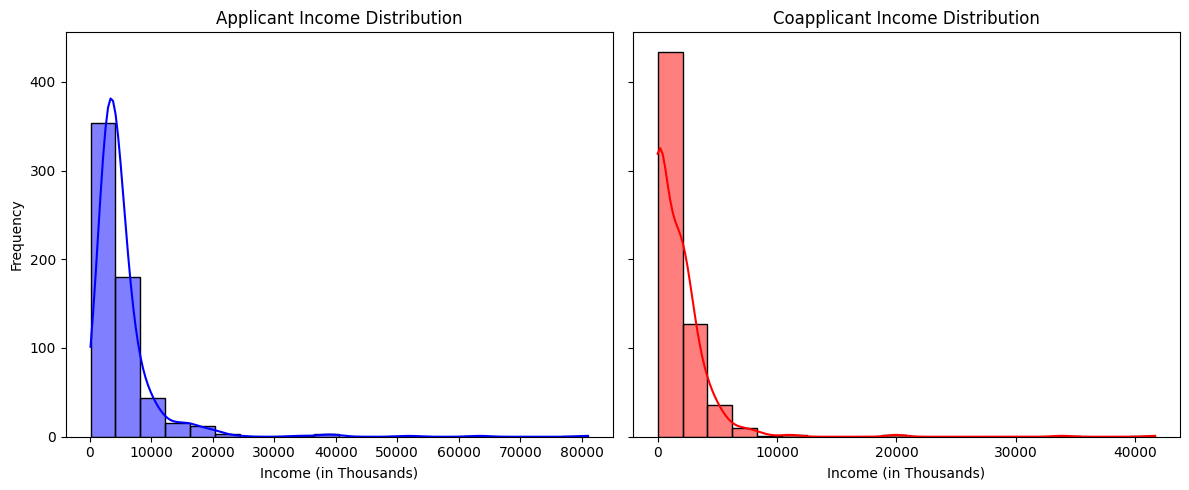

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load dataset
data = pd.read_csv("/content/train.csv")

# Ensure there are no missing values
data = data[['ApplicantIncome', 'CoapplicantIncome']].dropna()

# Extract relevant columns
applicant_income = data['ApplicantIncome']
coapplicant_income = data['CoapplicantIncome']

# Creating subplots for better clarity
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Histogram for Applicant Income
sns.histplot(applicant_income, bins=20, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Applicant Income Distribution")
axes[0].set_xlabel("Income (in Thousands)")
axes[0].set_ylabel("Frequency")  # Y-axis label

# Histogram for Coapplicant Income
sns.histplot(coapplicant_income, bins=20, kde=True, color="red", ax=axes[1])
axes[1].set_title("Coapplicant Income Distribution")
axes[1].set_xlabel("Income (in Thousands)")
axes[1].set_ylabel("Frequency")  # Added Y-axis label

# Improve layout
plt.tight_layout()
plt.show()


<ipython-input-12-fff6c0a04117>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(y=train_df['LoanAmount'], palette='coolwarm')


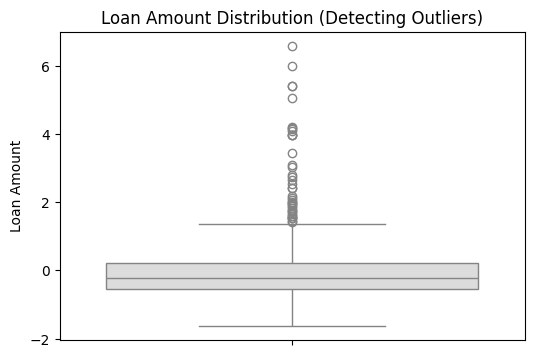

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(y=train_df['LoanAmount'], palette='coolwarm')
plt.title('Loan Amount Distribution (Detecting Outliers)')
plt.ylabel('Loan Amount')
plt.show()


count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64


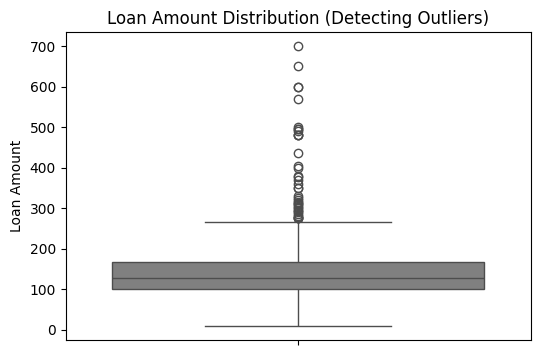

In [ ]:
import pandas as pd

# Load the original dataset
train_df = pd.read_csv("/content/train.csv")

# Check if LoanAmount looks normal (not standardized)
print(train_df['LoanAmount'].describe())

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.boxplot(y=train_df['LoanAmount'], color='gray')
plt.title("Loan Amount Distribution (Detecting Outliers)")
plt.ylabel("Loan Amount")
plt.show()


In [ ]:
train_df['LoanAmount'].describe()


,LoanAmount
count,592.000000
mean,146.412162
std,85.587325
min,9.000000
25%,100.000000
50%,128.000000
75%,168.000000
max,700.000000


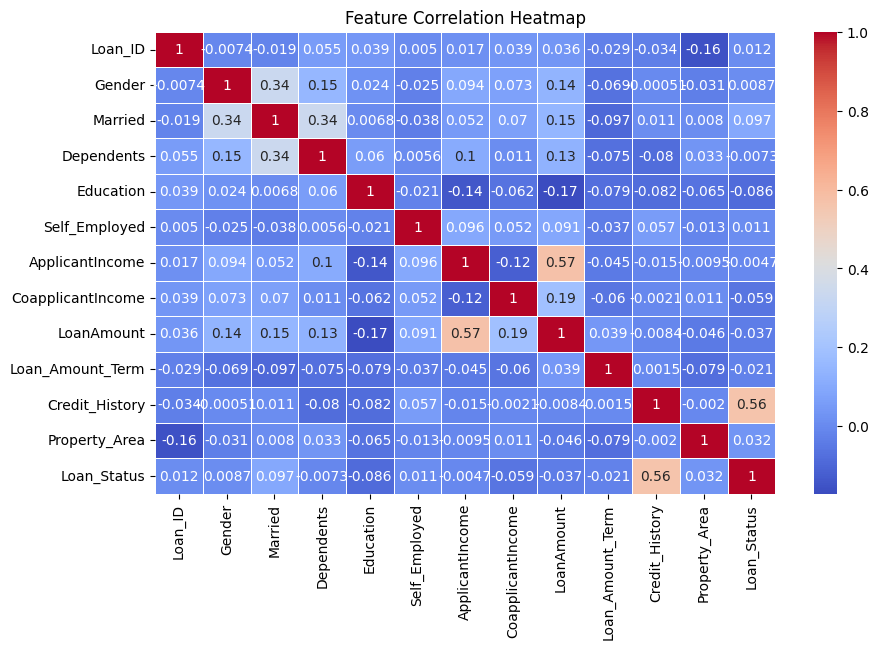

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = train_df.copy()
label_enc = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = label_enc.fit_transform(df_encoded[col])

plt.figure(figsize=(10,6))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Feature Correlation Heatmap')
plt.show()


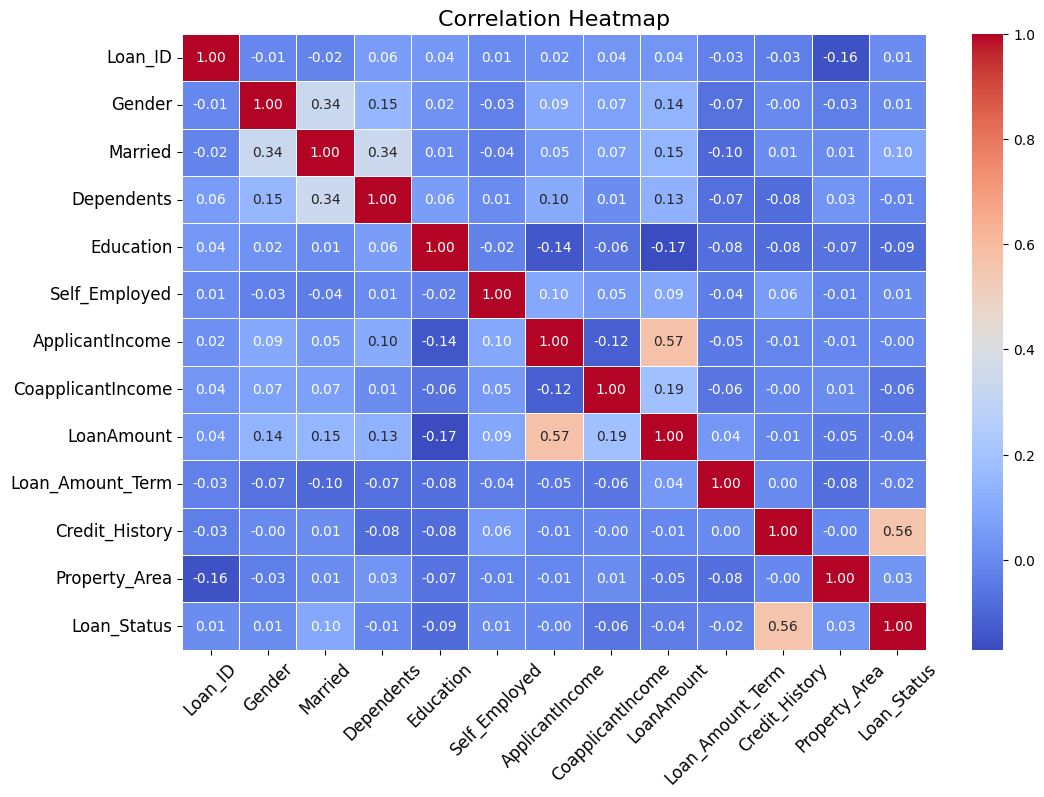

In [ ]:
from sklearn.preprocessing import LabelEncoder

df_encoded = train_df.copy()
label_enc = LabelEncoder()
for col in df_encoded.select_dtypes(include=['object']).columns:
    df_encoded[col] = label_enc.fit_transform(df_encoded[col])

plt.figure(figsize=(12,8))
sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap", fontsize=16)
plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)
plt.show()


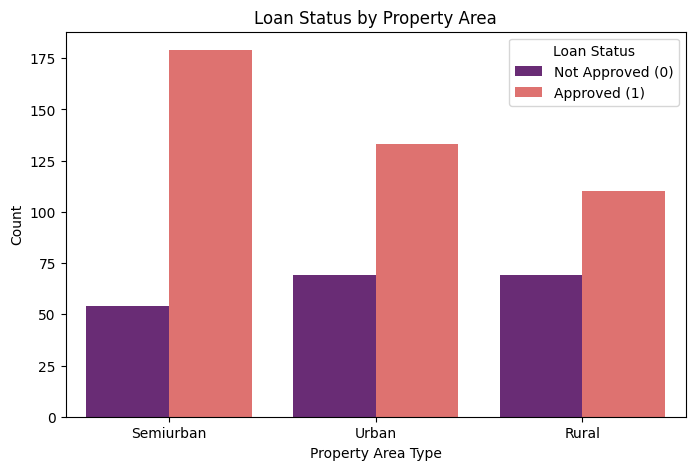

In [ ]:
property_area_mapping = {
    "Semiurban": train_df["Property_Area_Semiurban"],
    "Urban": train_df["Property_Area_Urban"],
    "Rural": 1 - (train_df["Property_Area_Semiurban"] + train_df["Property_Area_Urban"])  # Remaining category
}

property_area_df = pd.DataFrame(property_area_mapping)
property_area_df["Loan_Status"] = train_df["Loan_Status"]

melted_df = property_area_df.melt(id_vars=["Loan_Status"], var_name="Property_Area", value_name="Presence")
melted_df = melted_df[melted_df["Presence"] == 1]  # Only keep rows where Presence = 1

plt.figure(figsize=(8,5))
sns.countplot(x=melted_df['Property_Area'], hue=melted_df['Loan_Status'], palette='magma')
plt.title('Loan Status by Property Area')
plt.xlabel('Property Area Type')
plt.ylabel('Count')
plt.legend(title="Loan Status", labels=["Not Approved (0)", "Approved (1)"])
plt.show()


In [ ]:
# One-Hot Encoding for 'Property_Area' column
train_df = pd.get_dummies(train_df, columns=["Property_Area"], drop_first=False)

# Check if the columns are now present
print(train_df.columns)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')


In [ ]:
print(train_df.columns)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')


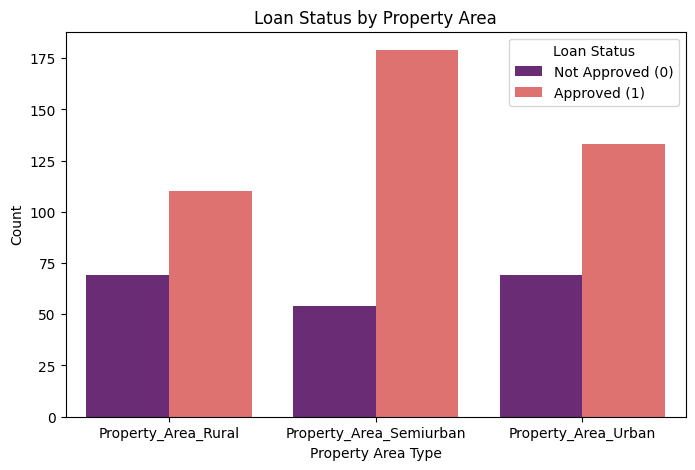

In [ ]:
# Correct column names based on the one-hot encoding
property_area_cols = [col for col in train_df.columns if "Property_Area" in col]

property_area_df = train_df[property_area_cols].copy()
property_area_df["Loan_Status"] = train_df["Loan_Status"]

melted_df = property_area_df.melt(id_vars=["Loan_Status"], var_name="Property_Area", value_name="Presence")
melted_df = melted_df[melted_df["Presence"] == 1]  # Only keep rows where Presence = 1

plt.figure(figsize=(8, 5))
sns.countplot(x=melted_df['Property_Area'], hue=melted_df['Loan_Status'], palette='magma')
plt.title('Loan Status by Property Area')
plt.xlabel('Property Area Type')
plt.ylabel('Count')
plt.legend(title="Loan Status", labels=["Not Approved (0)", "Approved (1)"])
plt.show()


In [ ]:
print(train_df.columns)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')


**MORE VIZS**

<ipython-input-23-a14b33df918c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=train_df['Credit_History'], y=train_df['Loan_Status'], palette='muted')


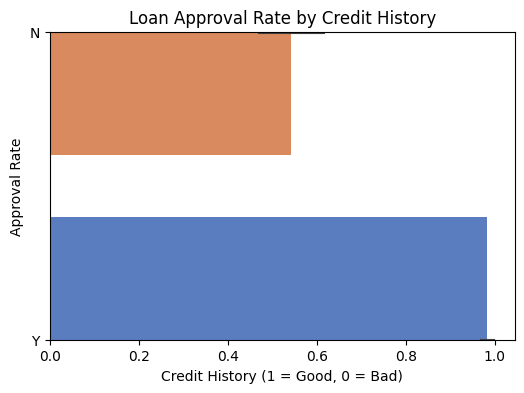

In [ ]:
# Credit History vs Loan Approval
plt.figure(figsize=(6,4))
sns.barplot(x=train_df['Credit_History'], y=train_df['Loan_Status'], palette='muted')
plt.title('Loan Approval Rate by Credit History')
plt.xlabel('Credit History (1 = Good, 0 = Bad)')
plt.ylabel('Approval Rate')
plt.ylim(0,1)
plt.show()


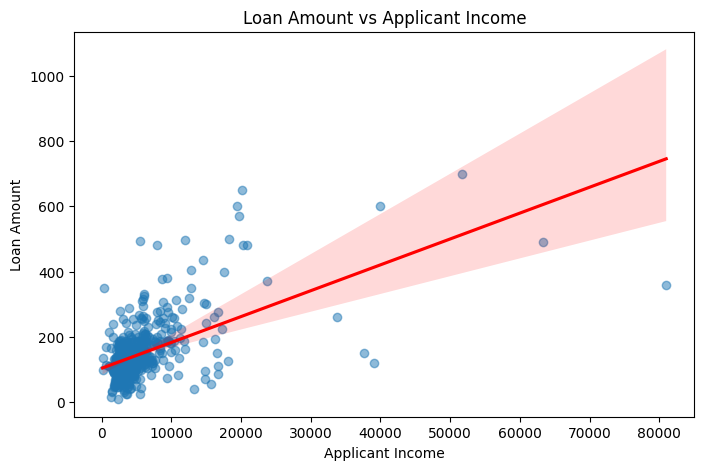

In [ ]:
plt.figure(figsize=(8,5))
sns.regplot(x=train_df['ApplicantIncome'], y=train_df['LoanAmount'], scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
plt.title('Loan Amount vs Applicant Income')
plt.xlabel('Applicant Income')
plt.ylabel('Loan Amount')
plt.show()


**TRIAL**

**MODEL BUILDING**


In [ ]:
print(train_df.columns)


Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Property_Area_Rural', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer

# Check column names to ensure 'Loan_Status_Y' is the target
print(train_df.columns)

# Assuming 'train_df' is your preprocessed dataset
target = 'Loan_Status_Y'  # Corrected to match the column name after one-hot encoding
X = train_df.drop(columns=[target])  # Features
y = train_df[target]  # Labels

# Handle missing values by imputing them
imputer = SimpleImputer(strategy='most_frequent')  # For categorical columns
X = X.apply(lambda col: imputer.fit_transform(col.values.reshape(-1, 1)).flatten() if col.isnull().any() else col)

# Encoding categorical columns (if not already encoded)
categorical_columns = ['Gender_Male', 'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Not Graduate', 'Self_Employed_Yes']  # Update to match your dataset

# Label Encoding for columns with few unique values
label_enc = LabelEncoder()
for col in categorical_columns:
    if X[col].dtype == 'object':  # Only apply label encoding to object columns
        X[col] = label_enc.fit_transform(X[col])

# Verifying there are no more NaN values and all columns are numeric
print("Missing values after imputation:\n", X.isnull().sum())

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

# Print evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', report)


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Gender_Male',
       'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes', 'Loan_Status_Y'],
      dtype='object')
Missing values after imputation:
 ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
dtype: int64
Accuracy: 0.7886
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

       False      

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import pandas as pd

# Drop unnecessary columns (like ID)
if 'Loan_ID' in train_df.columns:
    train_df = train_df.drop(columns=['Loan_ID'])

# Convert categorical columns to numeric using one-hot encoding
train_df = pd.get_dummies(train_df, drop_first=True)

# Handle missing values by imputing with the median
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(train_df.drop(columns=['Loan_Status']))
y = train_df['Loan_Status']

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', report)


KeyError: "['Loan_Status'] not found in axis"

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.impute import SimpleImputer
import pandas as pd

# Drop unnecessary columns (like ID)
if 'Loan_ID' in train_df.columns:
    train_df = train_df.drop(columns=['Loan_ID'])

# Convert categorical columns to numeric using one-hot encoding
train_df = pd.get_dummies(train_df, drop_first=True)

# Check the column names to identify the target column after one-hot encoding
print(train_df.columns)

# Assuming the target is now 'Loan_Status_Y' after one-hot encoding
y = train_df['Loan_Status_Y']  # Update based on actual column name
X = train_df.drop(columns=['Loan_Status_Y'])  # Drop the target column from features

# Handle missing values by imputing with the median
imputer = SimpleImputer(strategy='median')
X = imputer.fit_transform(X)

# Split the data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Logistic Regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate Model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', report)


Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area_Rural',
       'Property_Area_Semiurban', 'Property_Area_Urban', 'Gender_Male',
       'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes', 'Loan_Status_Y'],
      dtype='object')
Accuracy: 0.7886
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.42      0.58        43
        True       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Standardizing features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression with more iterations
log_reg = LogisticRegression(max_iter=500, solver='lbfgs')
log_reg.fit(X_train_scaled, y_train)

# Predictions
y_pred = log_reg.predict(X_test_scaled)

# Evaluate Performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.7886178861788617
Confusion Matrix:
 [[18 25]
 [ 1 79]]
Classification Report:
               precision    recall  f1-score   support

       False       0.95      0.42      0.58        43
        True       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123



**TRAINING BY ALTERNATIVE MODELS**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train_scaled, y_train)
y_pred_dt = dt_model.predict(X_test_scaled)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.7235772357723578
Confusion Matrix:
 [[22 21]
 [13 67]]
Classification Report:
               precision    recall  f1-score   support

       False       0.63      0.51      0.56        43
        True       0.76      0.84      0.80        80

    accuracy                           0.72       123
   macro avg       0.69      0.67      0.68       123
weighted avg       0.71      0.72      0.72       123



In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)
y_pred_rf = rf_model.predict(X_test_scaled)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


Random Forest Accuracy: 0.7642276422764228
Confusion Matrix:
 [[18 25]
 [ 4 76]]
Classification Report:
               precision    recall  f1-score   support

       False       0.82      0.42      0.55        43
        True       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123



In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric="logloss")
xgb_model.fit(X_train_scaled, y_train)
y_pred_xgb = xgb_model.predict(X_test_scaled)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))
print("Classification Report:\n", classification_report(y_test, y_pred_xgb))


XGBoost Accuracy: 0.7398373983739838
Confusion Matrix:
 [[20 23]
 [ 9 71]]
Classification Report:
               precision    recall  f1-score   support

       False       0.69      0.47      0.56        43
        True       0.76      0.89      0.82        80

    accuracy                           0.74       123
   macro avg       0.72      0.68      0.69       123
weighted avg       0.73      0.74      0.73       123



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [18:53:45] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


**OPTIMIZED RANDOM FOREST ATTEMPT**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# GridSearchCV for hyperparameter tuning
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Train final model with best parameters
best_rf = RandomForestClassifier(**best_params, random_state=42)
best_rf.fit(X_train, y_train)

# Predictions
y_pred = best_rf.predict(X_test)

# Performance evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Optimized Random Forest Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)


KeyboardInterrupt: 

In [ ]:
# Train a new model with class balancing
best_rf = RandomForestClassifier(**best_params, random_state=42, class_weight={0:2, 1:1})
best_rf.fit(X_train, y_train)

# Predictions
y_pred = best_rf.predict(X_test)

# Performance evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Balanced Random Forest Accuracy: {accuracy:.4f}")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)


NameError: name 'best_params' is not defined

**MY TRIAL**

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encoding categorical columns with LabelEncoder
label_enc = LabelEncoder()
for col in ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed']:
    X[col] = label_enc.fit_transform(X[col])

# Verifying that all columns are now numeric
print("Remaining object columns after encoding:", X.select_dtypes(include=['object']).columns)

# Train-Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Initialization
model = LogisticRegression(max_iter=1000)

# Model Training
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.4f}')
print('Confusion Matrix:\n', conf_matrix)
print('Classification Report:\n', report)

# Plotting Confusion Matrix
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


KeyError: 'Gender'

In [ ]:
from sklearn.impute import SimpleImputer

# Impute missing values in categorical and numerical columns
imputer = SimpleImputer(strategy='most_frequent')  # For categorical columns
X = X.apply(lambda col: imputer.fit_transform(col.values.reshape(-1, 1)).flatten() if col.isnull().any() else col)

# Verifying that there are no more NaN values
print("Missing values after imputation:\n", X.isnull().sum())


Missing values after imputation:
 ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
dtype: int64


In [ ]:
# Drop rows with any NaN values
X = X.dropna()
y = y[X.index]  # Make sure the target variable is aligned with the modified dataset


In [ ]:
print(X.isnull().sum())  # Check how many missing values in each column


ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Property_Area_Rural        0
Property_Area_Semiurban    0
Property_Area_Urban        0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
dtype: int64


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Define models to compare
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Support Vector Machine": SVC()
}

# Prepare results storage
results = {}

# Split data (ensure X and y are correctly prepared)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)  # Train model
    y_pred = model.predict(X_test)  # Make predictions

    # Store accuracy
    results[name] = accuracy_score(y_test, y_pred)

    # Print classification report
    print(f"\n{name} Performance:")
    print(classification_report(y_test, y_pred))

# Compare accuracies
print("\nModel Performance Comparison:")
for model, acc in results.items():
    print(f"{model}: {acc:.4f}")


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



Logistic Regression Performance:
              precision    recall  f1-score   support

       False       0.95      0.42      0.58        43
        True       0.76      0.99      0.86        80

    accuracy                           0.79       123
   macro avg       0.85      0.70      0.72       123
weighted avg       0.83      0.79      0.76       123


Decision Tree Performance:
              precision    recall  f1-score   support

       False       0.56      0.47      0.51        43
        True       0.74      0.80      0.77        80

    accuracy                           0.68       123
   macro avg       0.65      0.63      0.64       123
weighted avg       0.67      0.68      0.68       123


Random Forest Performance:
              precision    recall  f1-score   support

       False       0.75      0.42      0.54        43
        True       0.75      0.93      0.83        80

    accuracy                           0.75       123
   macro avg       0.75      0.67     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
import pandas as pd

# Load the actual test dataset
test_data = pd.read_csv("test.csv")

# Ensure the same preprocessing as train data
X_test_final = test_data[X_train.columns]  # Select only the trained features

# Dictionary to store test.csv results
test_results = {}

# Evaluate each trained model on test.csv
for name, model in models.items():
    y_pred_test = model.predict(X_test_final)  # Make predictions on test.csv
    test_results[name] = y_pred_test

# Convert to DataFrame for easy viewing
test_predictions_df = pd.DataFrame(test_results)
print(test_predictions_df.head())  # Show first few predictions


KeyError: "['Property_Area_Rural', 'Property_Area_Semiurban', 'Property_Area_Urban', 'Gender_Male', 'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+', 'Education_Not Graduate', 'Self_Employed_Yes'] not in index"

In [ ]:
# Load test data
test_data = pd.read_csv("test.csv")

# Apply the same preprocessing as train data
X_test_final = pd.get_dummies(test_data)  # Convert categorical features

# Ensure all columns match between train and test
missing_cols = set(X_train.columns) - set(X_test_final.columns)  # Find missing columns

# Add missing columns with default value (0)
for col in missing_cols:
    X_test_final[col] = 0  # Set missing columns to 0

# Reorder columns to match training data
X_test_final = X_test_final[X_train.columns]


In [ ]:
# Dictionary to store test.csv results
test_results = {}

for name, model in models.items():
    y_pred_test = model.predict(X_test_final)  # Predict on test.csv
    test_results[name] = y_pred_test

# Convert to DataFrame for easy viewing
test_predictions_df = pd.DataFrame(test_results)
print(test_predictions_df.head())  # Show first few predictions


ValueError: Input X contains NaN.
LogisticRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [ ]:
from sklearn.linear_model import LogisticRegression

# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
import pandas as pd

# Get feature coefficients
coefficients = model.coef_[0]  # Extract coefficients
feature_names = X_train.columns  # Get feature names

# Display coefficients in a DataFrame
coef_df = pd.DataFrame({"Feature": feature_names, "Coefficient": coefficients})
coef_df.sort_values(by="Coefficient", ascending=False)


,Feature,Coefficient
4,Credit_History,3.038431
6,Property_Area_Semiurban,0.549203
9,Married_Yes,0.368826
11,Dependents_2,0.270830
12,Dependents_3+,0.118842
14,Self_Employed_Yes,0.081180
0,ApplicantIncome,-0.000009
1,CoapplicantIncome,-0.000062
2,LoanAmount,-0.001589
3,Loan_Amount_Term,-0.003940


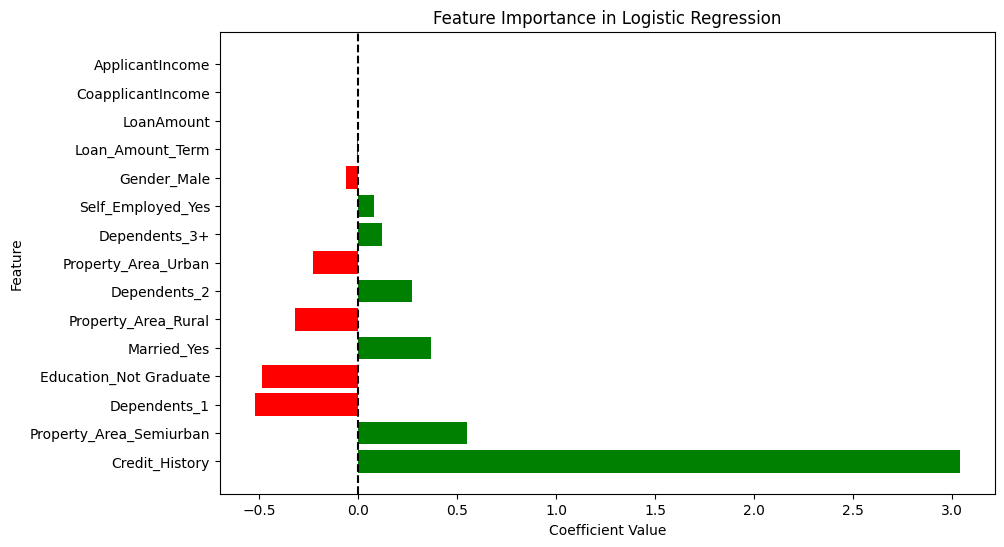

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Feature names and their corresponding coefficients
features = [
    "Credit_History", "Property_Area_Semiurban", "Married_Yes", "Dependents_2",
    "Dependents_3+", "Self_Employed_Yes", "ApplicantIncome", "CoapplicantIncome",
    "LoanAmount", "Loan_Amount_Term", "Gender_Male", "Property_Area_Urban",
    "Property_Area_Rural", "Education_Not Graduate", "Dependents_1"
]

coefficients = [3.038, 0.549, 0.369, 0.271, 0.119, 0.081, -0.000009, -0.000062,
                -0.001589, -0.00394, -0.060, -0.229, -0.319, -0.487, -0.521]

# Sort features by absolute coefficient value
sorted_indices = np.argsort(np.abs(coefficients))[::-1]
sorted_features = [features[i] for i in sorted_indices]
sorted_coefficients = [coefficients[i] for i in sorted_indices]

# Plot
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_coefficients, color=['green' if c > 0 else 'red' for c in sorted_coefficients])
plt.xlabel("Coefficient Value")
plt.ylabel("Feature")
plt.title("Feature Importance in Logistic Regression")
plt.axvline(x=0, color='black', linestyle='--')
plt.show()


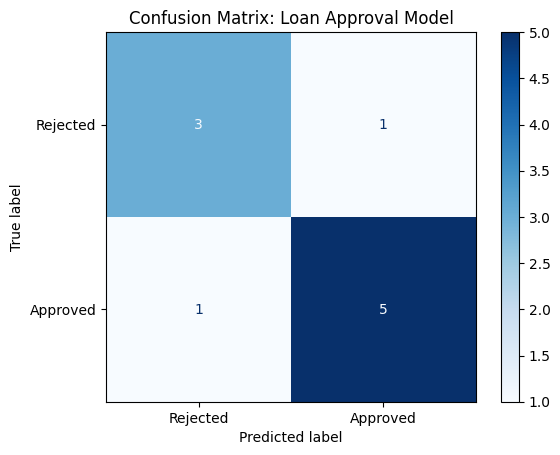

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Replace these with your actual labels and predictions
y_true = [1, 0, 1, 1, 0, 1, 0, 1, 1, 0]  # Example ground truth values
y_pred = [1, 0, 1, 1, 0, 0, 1, 1, 1, 0]  # Example predictions

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Display confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Rejected", "Approved"])
disp.plot(cmap="Blues")
plt.title("Confusion Matrix: Loan Approval Model")
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix

# Assuming you already have y_test (actual labels) and y_pred (model predictions)
cm = confusion_matrix(y_test, y_pred)

print(cm)


ValueError: Found input variables with inconsistent numbers of samples: [123, 10]

In [ ]:
# Assuming you trained a logistic regression model named 'model'
y_pred = model.predict(X_test)  # Predicted labels
y_true = y_test  # Actual labels

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)
print(cm)


[[18 25]
 [ 1 79]]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


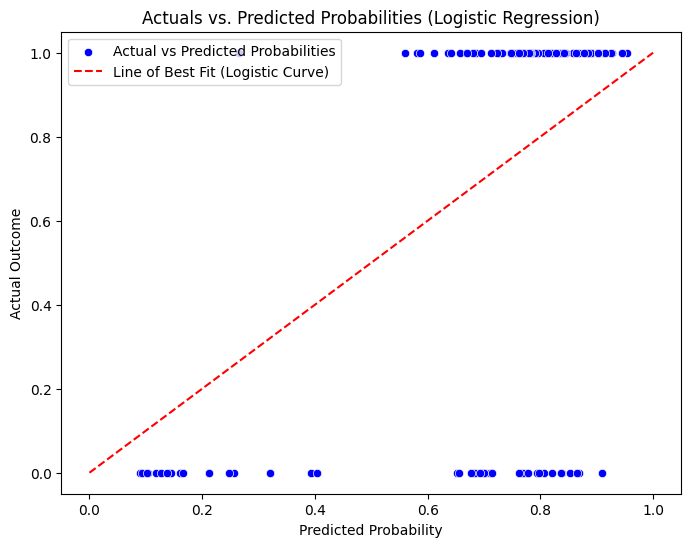

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, roc_auc_score

# Assuming 'df' is your DataFrame and 'loan_approval' is the target variable, and 'feature_columns' is your list of features.

# Example setup:
# df = pd.read_csv('your_data.csv')  # Load your dataset
# X = df[feature_columns]
# y = df['loan_approval']

# Splitting dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict probabilities for the test set
y_pred_prob = model.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Plot actuals vs predicted probabilities
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_pred_prob, y=y_test, label='Actual vs Predicted Probabilities', color='blue')

# Add the line of best fit (logistic regression curve)
# We can plot a logistic curve on top of the scatter plot
plt.plot([0, 1], [0, 1], linestyle='--', color='red', label="Line of Best Fit (Logistic Curve)")

plt.title('Actuals vs. Predicted Probabilities (Logistic Regression)')
plt.xlabel('Predicted Probability')
plt.ylabel('Actual Outcome')
plt.legend()
plt.show()


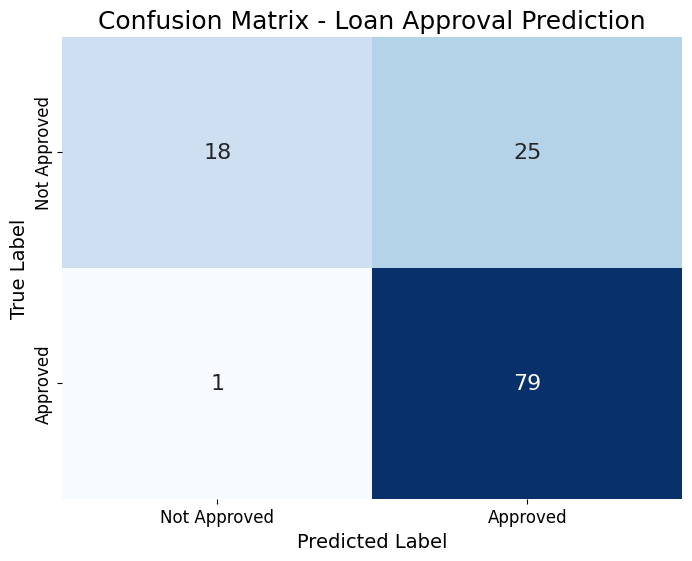

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have y_true and y_pred from your model predictions
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, annot_kws={"size": 16})
plt.title('Confusion Matrix - Loan Approval Prediction', fontsize=18)
plt.xlabel('Predicted Label', fontsize=14)
plt.ylabel('True Label', fontsize=14)
plt.xticks([0.5, 1.5], ['Not Approved', 'Approved'], fontsize=12)
plt.yticks([0.5, 1.5], ['Not Approved', 'Approved'], fontsize=12)
plt.show()
